### Plotting the water quality data from the John Stolz group

#### There are three types of analyses the Stolz group performed:

- ion chromatography: chloride, bromine, nitrate, phosphate
- ICP-MS (inductivly coupled plasma - mass spectrometry)
- GC (gas chromoatography) for VOCs (volatile organic compounds)

#### Samples were taken at the 9 sites on these dates:

- August 20, 2021
- November 19, 2021
- March 24, 2022
- July 16, 2022

In [41]:
# LIBRARIES
#import pandas library for working with tabular data
import os
os.getcwd()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
from scipy.stats import kde
from matplotlib import cm
import datetime
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
#import regular expresson (regex)
import re
#check pandas version
pd.__version__

'1.0.5'

In [42]:
# read from csv 
biweek = pd.read_csv("/home/millieginty/Documents/git-repos/ccbor/data/biweekly/ccbor-biweekly-stolz.csv", parse_dates=['date'])

biweek.head()

,site,date,latitude,longitude,epsg3857_x,epsg3857_y,Sampling time,Watershed,Location,Samplers,...,W(mg/L),Pb(mg/L),Bi(mg/L),U(mg/L),Methane,Ethane,Ethene,Propane,Propylene,Butane
0,1,2021-08-13,40.464786,-82.854767,-9.223350e+06,4.933715e+06,11:00:00 AM,West Branch Alum Creek,Upstream,"CH, BL, KM, SB, JP",...,bdl,0.0002,bdl,0.0025,16.0,bdl,bdl,bdl,NaN,NaN
1,1,2021-09-03,40.464786,-82.854767,-9.223350e+06,4.933715e+06,11:00:00 AM,West Branch Alum Creek,Upstream,"CH, BL, SB",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2021-09-17,40.464786,-82.854767,-9.223350e+06,4.933715e+06,11:00:00 AM,West Branch Alum Creek,Upstream,"BL, KM",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2021-10-01,40.464786,-82.854767,-9.223350e+06,4.933715e+06,10:51:00 AM,West Branch Alum Creek,Upstream,"CH, KM, BK",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2021-10-15,40.464786,-82.854767,-9.223350e+06,4.933715e+06,10:42:00 AM,West Branch Alum Creek,Upstream,"CH, KM, CO",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
## Split the dataframe into site-specific dataframes

biweek1 = biweek[biweek['site'] == 1] # West Branch Alum Creek, upstream
biweek2 = biweek[biweek['site'] == 2] # West Branch Alum Creek, downstream 1
biweek3 = biweek[biweek['site'] == 3] # West Branch Alum Creek, downstream 2
biweek4 = biweek[biweek['site'] == 4] # Headwaters Alum Creek, upstream
biweek5 = biweek[biweek['site'] == 5] # Headwaters Alum Creek, downstream
biweek6 = biweek[biweek['site'] == 6] # Headwaters Alum Creek, intermediate 2
biweek7 = biweek[biweek['site'] == 7] # Headwaters Alum Creek, intermediate 1
biweek8 = biweek[biweek['site'] == 8] # Headwaters Big Walnut Creek, downstream
biweek9 = biweek[biweek['site'] == 9] # Little Walnut Creek, downstream

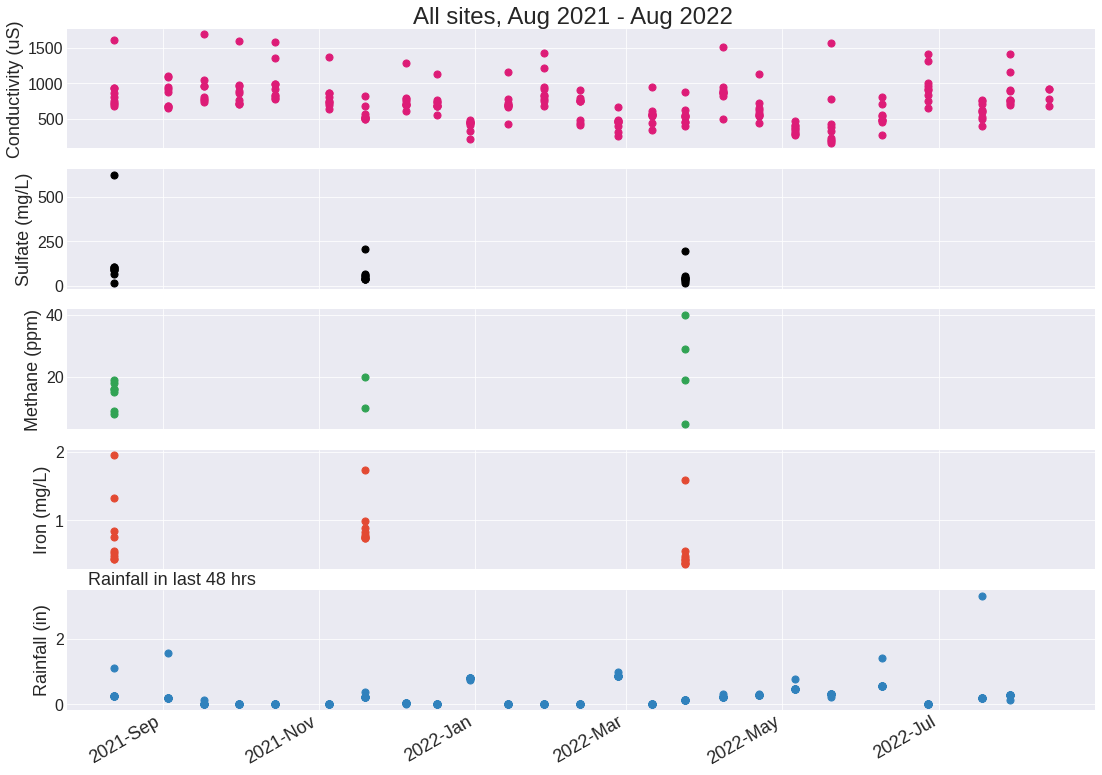

In [44]:
# plot the conductivity, total dissolved solids, and water temperature from August 2021 to August 2022

style.use("seaborn-darkgrid")

fig2, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5,1,sharey=False, sharex = True, figsize=(15,10))
fig2.tight_layout() 

SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 24

fig2.suptitle('All sites, Aug 2021 - Aug 2022', size = BIGGER_SIZE, y = 1.01)

orig_map=plt.cm.get_cmap('coolwarm')

# Conductivity

biweek.plot(ax = ax1, kind='scatter', s = 50, \
            x='date', y= 'cond', c= "#dd1c77") # add in cmap = orig_map and c= biweek.temp to get temp as colors
ax1.set_ylabel('Conductivity (uS)', size = MEDIUM_SIZE)
ax1.set_xlabel('')
ax1.set(xticklabels=[])
ax1.tick_params(axis='y', which='major', labelsize = SMALL_SIZE)
ax1.grid(True)


# Sulfate, phosphate

biweek.plot(ax = ax2, kind='scatter', s = 50, \
            x='date', y= 'Sulfate', c = "black")
ax2.set_ylabel('Sulfate (mg/L)', size = MEDIUM_SIZE)
ax2.set_xlabel('')
ax2.set(xticklabels=[])
ax2.tick_params(axis='y', which='major', labelsize = SMALL_SIZE)
ax2.grid(True)

# VOCs

biweek.plot(ax = ax3, kind='scatter', s = 50, \
            x='date', y= 'Methane', c = "#31a354")
ax3.set_ylabel('Methane (ppm)', size = MEDIUM_SIZE)
ax3.set_xlabel('')
ax3.set_xticklabels(biweek.date, rotation = 90, size = MEDIUM_SIZE)
ax3.tick_params(axis='y', which='major', labelsize = SMALL_SIZE)
ax3.grid(True)

# Metals

biweek.plot(ax = ax4, kind='scatter', s = 50, \
            x='date', y= 'Fe', c = "#e34a33")
ax4.set_ylabel('Iron (mg/L)', size = MEDIUM_SIZE)
ax4.set_xlabel('')
ax4.set_xticklabels(biweek.date, rotation = 90, size = MEDIUM_SIZE)
ax4.tick_params(axis='y', which='major', labelsize = SMALL_SIZE)
ax4.grid(True)

# Rainfall in last 48 hrs 

biweek.plot(ax = ax5, kind='scatter', s = 50, \
            x='date', y= 'rainfall', c = "#3182bd")
ax5.set_ylabel('Rainfall (in)', size = MEDIUM_SIZE)
ax5.set_xlabel('')
ax5.tick_params(axis='y', which='major', labelsize = SMALL_SIZE)
ax = ax5
ax.set_title('Rainfall in last 48 hrs', loc='left', y=0.85, x=0.02,
             size = MEDIUM_SIZE)

ax = ax5
ax5.set_xticklabels(biweek.date, rotation = 90, size = MEDIUM_SIZE)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')
    
ax5.grid(True);

In [45]:
# plot the conductivity, total dissolved solids, and water temperature from August 2021 to August 2022

style.use("seaborn-darkgrid")

fig2, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5,1,sharey=False, sharex = True, figsize=(15,10))
fig2.tight_layout() 

SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 24

fig2.suptitle('All sites, Aug 2021 - Aug 2022', size = BIGGER_SIZE, y = 1.01)

orig_map=plt.cm.get_cmap('coolwarm')

# Conductivity

biweek9.plot(ax = ax1, kind='scatter', s = 50, \
            x='date', y= 'cond', c= "#dd1c77") # add in cmap = orig_map and c= biweek9.temp to get temp as colors
ax1.set_ylabel('Conductivity (uS)', size = MEDIUM_SIZE)
ax1.set_xlabel('')
ax1.set(xticklabels=[])
ax1.tick_params(axis='y', which='major', labelsize = SMALL_SIZE)
ax1.grid(True)


# Sulfate, phosphate

biweek9.plot(ax = ax2, kind='scatter', s = 50, \
            x='date', y= 'Sulfate', c = "black")
ax2.set_ylabel('Sulfate (mg/L)', size = MEDIUM_SIZE)
ax2.set_xlabel('')
ax2.set(xticklabels=[])
ax2.tick_params(axis='y', which='major', labelsize = SMALL_SIZE)
ax2.grid(True)

# VOCs

biweek9.plot(ax = ax3, kind='scatter', s = 50, \
            x='date', y= 'Methane', c = "#31a354")
ax3.set_ylabel('Methane (ppm)', size = MEDIUM_SIZE)
ax3.set_xlabel('')
ax3.set_xticklabels(biweek9.date, rotation = 90, size = MEDIUM_SIZE)
ax3.tick_params(axis='y', which='major', labelsize = SMALL_SIZE)
ax3.grid(True)

# Metals

biweek9.plot(ax = ax4, kind='scatter', s = 50, \
            x='date', y= 'Fe', c = "#e34a33")
ax4.set_ylabel('Iron (mg/L)', size = MEDIUM_SIZE)
ax4.set_xlabel('')
ax4.set_xticklabels(biweek9.date, rotation = 90, size = MEDIUM_SIZE)
ax4.tick_params(axis='y', which='major', labelsize = SMALL_SIZE)
ax4.grid(True)

# Rainfall in last 48 hrs 

biweek9.plot(ax = ax5, kind='scatter', s = 50, \
            x='date', y= 'rainfall', c = "#3182bd")
ax5.set_ylabel('Rainfall (in)', size = MEDIUM_SIZE)
ax5.set_xlabel('')
ax5.tick_params(axis='y', which='major', labelsize = SMALL_SIZE)
ax = ax5
ax.set_title('Rainfall in last 48 hrs', loc='left', y=0.85, x=0.02,
             size = MEDIUM_SIZE)

ax = ax5
ax5.set_xticklabels(biweek9.date, rotation = 90, size = MEDIUM_SIZE)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')
    
ax5.grid(True);

ConversionError: Failed to convert value(s) to axis units: masked_array(data=[--, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --],
             mask=[ True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True],
       fill_value=1e+20,
            dtype=float64)

<Figure size 1080x720 with 5 Axes>